In [1]:
from fastai.vision.data import ImageDataBunch
from fastai.vision.transform import *

In [ ]:
class SampleGenerator:
    def __init__(self, df, path, folder, label_col, fn_col):
        self.df = df
        self.folder = folder
        self.label_col = label_col
        self.fn_col = fn_col
        self.path = path
        
    def get_sample_generator(self, field, value):
        df = self.df[(self.df[field] == value) & (self.df['PhotoAmt'] > 0)]
        return ImageDataBunch.from_df(path = self.path, df = df, folder = 'train_images', label_col = self.label_col, fn_col = self.fn_col,  ds_tfms = get_transforms(), size = 224)

In [ ]:
sample_generator = SampleGenerator(df, 'train_images', label_col = 'AdoptionSpeed', fn_col = 'image')

In [ ]:
generator = sample_generator.get_sample_generator('AdoptionSpeed', 0)

In [ ]:
generator.show_batch()

In [1]:
import sys
print(sys.path)

['', 'I:\\Users\\Venom\\Anaconda3\\python36.zip', 'I:\\Users\\Venom\\Anaconda3\\DLLs', 'I:\\Users\\Venom\\Anaconda3\\lib', 'I:\\Users\\Venom\\Anaconda3', 'C:\\Users\\Venom\\AppData\\Roaming\\Python\\Python36\\site-packages', 'I:\\Users\\Venom\\Anaconda3\\lib\\site-packages', 'I:\\Users\\Venom\\Anaconda3\\lib\\site-packages\\fastai-1.0.32.dev0-py3.6.egg', 'I:\\Users\\Venom\\Anaconda3\\lib\\site-packages\\torchvision_nightly-0.2.1-py3.6.egg', 'I:\\Users\\Venom\\Anaconda3\\lib\\site-packages\\msgpack-0.6.0-py3.6-win-amd64.egg', 'I:\\Users\\Venom\\Anaconda3\\lib\\site-packages\\win32', 'I:\\Users\\Venom\\Anaconda3\\lib\\site-packages\\win32\\lib', 'I:\\Users\\Venom\\Anaconda3\\lib\\site-packages\\Pythonwin', 'I:\\Users\\Venom\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Venom\\.ipython']


In [2]:
from catboost import CatBoostClassifier

In [14]:
idb = ImageDataBunch.from_df(path = '.', df = df, folder = 'train_images', label_col = 'AdoptionSpeed', fn_col = 'image', ds_tfms = get_transforms(), size = 224)

In [ ]:
idb.show_batch()

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as Image
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
df = pd.read_csv('train.csv')

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
# df.head()

In [5]:
breed_df = pd.read_csv('breed_labels.csv')

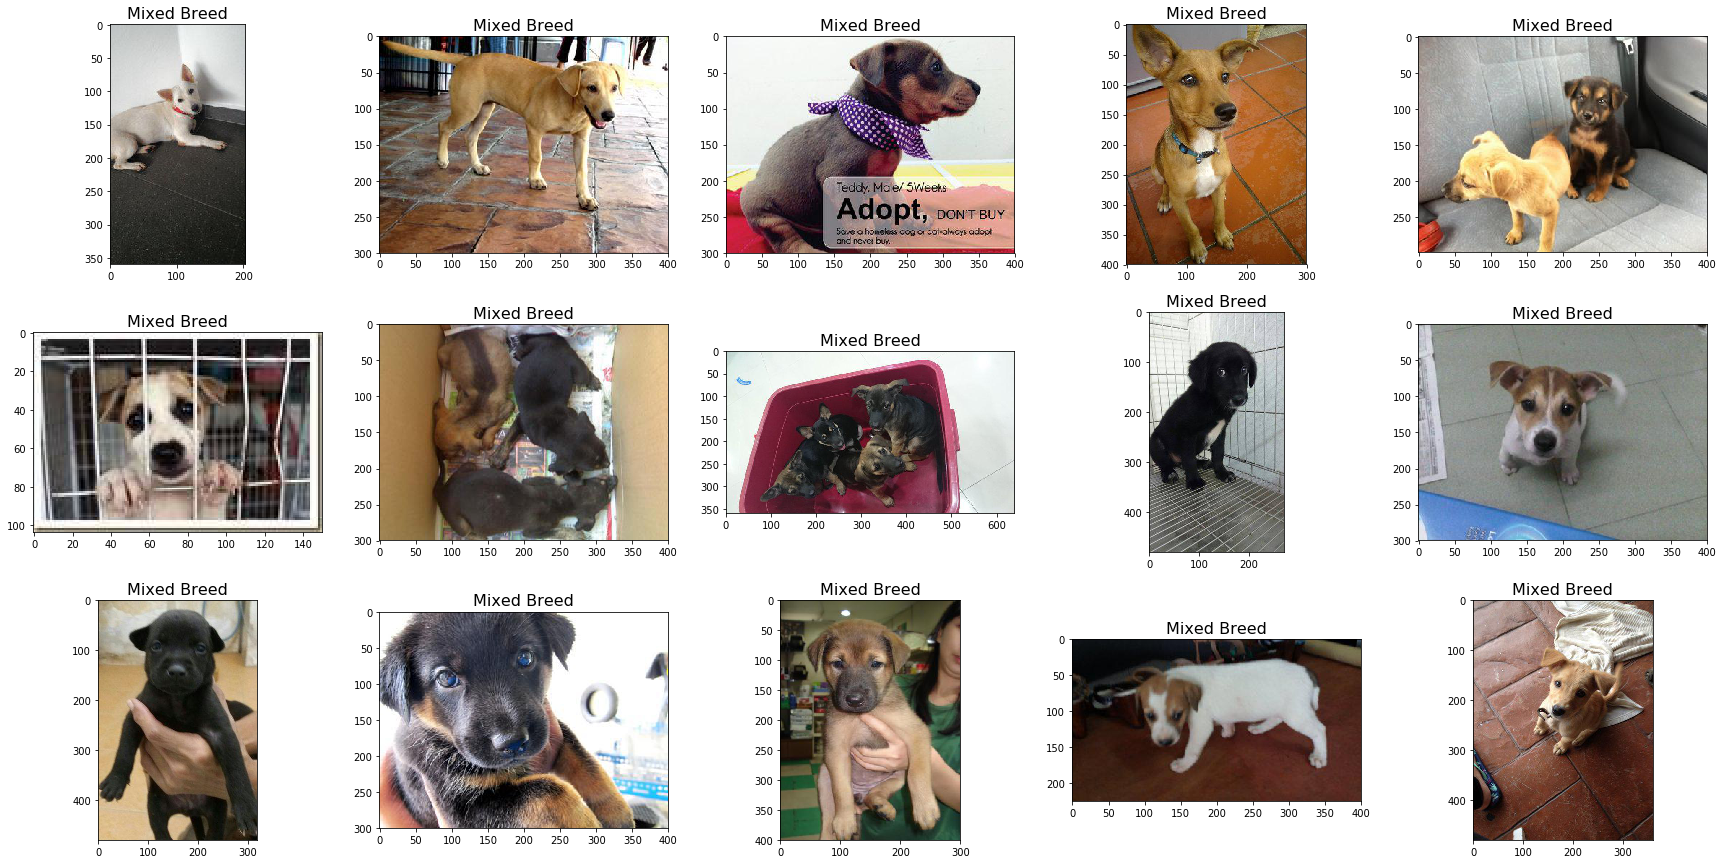

In [6]:
filtered_df = df[(df.Type == 1) & (df.AdoptionSpeed == 2) & (df.PhotoAmt > 0)].sample(15)
image_set = np.split(filtered_df[['PetID', 'Breed1']], 3)

f, axarr = plt.subplots(3, 5, figsize=(30,15))
for ax, images in zip(axarr, image_set):
    for ax_one, (petId, breedID) in zip(ax, images.values):
        img = Image.imread(Path(f"train_images/{petId}-1.jpg"))
        breed_name = breed_df[breed_df.BreedID == breedID].BreedName.values[0]
        ax_one.imshow(img)
        ax_one.set_title(breed_name, fontsize=16)

In [7]:
filtered_df.Description.iloc[1]

'Very cute, playful active puppy. available for adoption. Adopter must spay puppy at 5 months of age. This is not a labrador. This is a local mix. size at full grown about 15kg+/-.'

In [4]:
train = df[df.Type == 2]

In [5]:
drop_cols = ['Type', 'Name', 'VideoAmt', 'PhotoAmt', 'RescuerID', 'Description', 'PetID']

In [14]:
y = train.AdoptionSpeed
train.drop('AdoptionSpeed', axis=1, inplace=true)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2
5,2,NaN,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2
6,2,BULAT,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3
8,2,NaN,2,265,0,2,6,0,0,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6
9,2,Kitty,12,265,0,2,1,7,0,2,2,3,3,3,1,1,0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2
11,2,Kali,3,264,0,2,1,2,5,3,3,1,1,2,1,1,50,41326,a9caef3f98e67bfac9093cca79e20b93,0,Kali is a super playful kitten who is on the g...,8e76c8e39,2
13,2,2 Mths Old Cute Kitties,2,265,0,3,1,6,7,1,2,2,2,3,1,7,0,41326,2c118b2a1d1b4cf1f735089c7c0a07c0,0,Hi Pet Lovers! This is my first posting and I ...,4a9793dfb,1
16,2,Brownie,6,266,0,2,2,0,0,1,1,1,1,1,1,1,0,41326,58e3aa0b4b78e8879f81774ede0646fe,0,to be spayed on /12 adorable & friendly,b38a74866,1
19,2,NaN,1,266,0,3,1,2,7,1,1,2,2,2,1,5,0,41326,b752f78276215f44581eeb6eea1e63bc,0,"Birth Date: Oct 30th Kitty 1, Melly -Female Sa...",b10e7605a,1


In [15]:
X = train.drop(drop_cols, axis=1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

I:\Users\Venom\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [17]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [18]:
categorical_features_indices = [1,2,3,4,5,6,9,10,11, 15]

In [19]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=5, depth=5, learning_rate=0.1,  loss_function='MultiClass')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: -1.2722661	test: -1.2677906	best: -1.2677906 (0)	total: 249ms	remaining: 996ms
1:	learn: -1.0337616	test: -1.0300022	best: -1.0300022 (1)	total: 398ms	remaining: 596ms
2:	learn: -0.8635917	test: -0.8601798	best: -0.8601798 (2)	total: 547ms	remaining: 365ms
3:	learn: -0.7345124	test: -0.7315047	best: -0.7315047 (3)	total: 679ms	remaining: 170ms
4:	learn: -0.6410078	test: -0.6379357	best: -0.6379357 (4)	total: 825ms	remaining: 0us

bestTest = -0.6379357297
bestIteration = 4



In [20]:
test_set = pd.read_csv('test.csv')

In [21]:
submission = pd.DataFrame()
submission['PetID'] = test_set['PetID']
test_set.drop(drop_cols, axis=1, inplace=True)
submission['AdoptionSpeed'] = model.predict(test_set)

CatboostError: c:/goagent/pipelines/buildmaster/catboost.git/catboost/libs/data_new/model_dataset_compatibility.cpp:146: Feature AdoptionSpeed is present in model but not in pool.

In [30]:
submission.to_csv("submission.csv")